In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
import plotly.express as px
import os
import warnings
import joblib
warnings.filterwarnings("ignore")

In [75]:
TR_data=pd.read_csv("smoke_dataset.csv")
TR_data.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1655127646,15.127,42.98,199,426,12775,20524,937.420,1.55,1.61,10.66,1.663,0.038,3338,0
1,1654734418,27.107,54.80,0,400,13058,19961,939.799,0.21,0.22,1.46,0.228,0.005,1087,0
2,1654714047,26.370,45.80,144,409,12784,20580,937.376,1.97,2.05,13.59,2.118,0.048,1860,0
3,1654715196,25.980,48.42,180,431,12771,20537,937.333,1.93,2.01,13.31,2.075,0.047,3009,0
4,1655125243,-1.197,41.36,76,400,12791,20673,937.556,1.90,1.97,13.08,2.040,0.046,935,0


In [76]:
TR_data.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [77]:
TR_data['Fire Alarm'].unique()

array([0, 1], dtype=int64)

In [78]:
TR_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             5000 non-null   int64  
 1   Temperature[C]  5000 non-null   float64
 2   Humidity[%]     5000 non-null   float64
 3   TVOC[ppb]       5000 non-null   int64  
 4   eCO2[ppm]       5000 non-null   int64  
 5   Raw H2          5000 non-null   int64  
 6   Raw Ethanol     5000 non-null   int64  
 7   Pressure[hPa]   5000 non-null   float64
 8   PM1.0           5000 non-null   float64
 9   PM2.5           5000 non-null   float64
 10  NC0.5           5000 non-null   float64
 11  NC1.0           5000 non-null   float64
 12  NC2.5           5000 non-null   float64
 13  CNT             5000 non-null   int64  
 14  Fire Alarm      5000 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 586.1 KB


In [79]:
TR_data.duplicated().sum()

0

In [80]:
TR_data = TR_data.rename(columns={"Temperature[C]": "Temperature", "Humidity[%]": "Humidity","TVOC[ppb]": "TVOC","eCO2[ppm]": "eCO2","Pressure[hPa]": "Pressure","Raw Ethanol":"Ethanol","Raw H2":"H2","PM1.0":"PM1","PM2.5":"PM25","NC0.5":"NC05","NC1.0":"NC1","NC2.5":"NC25"})

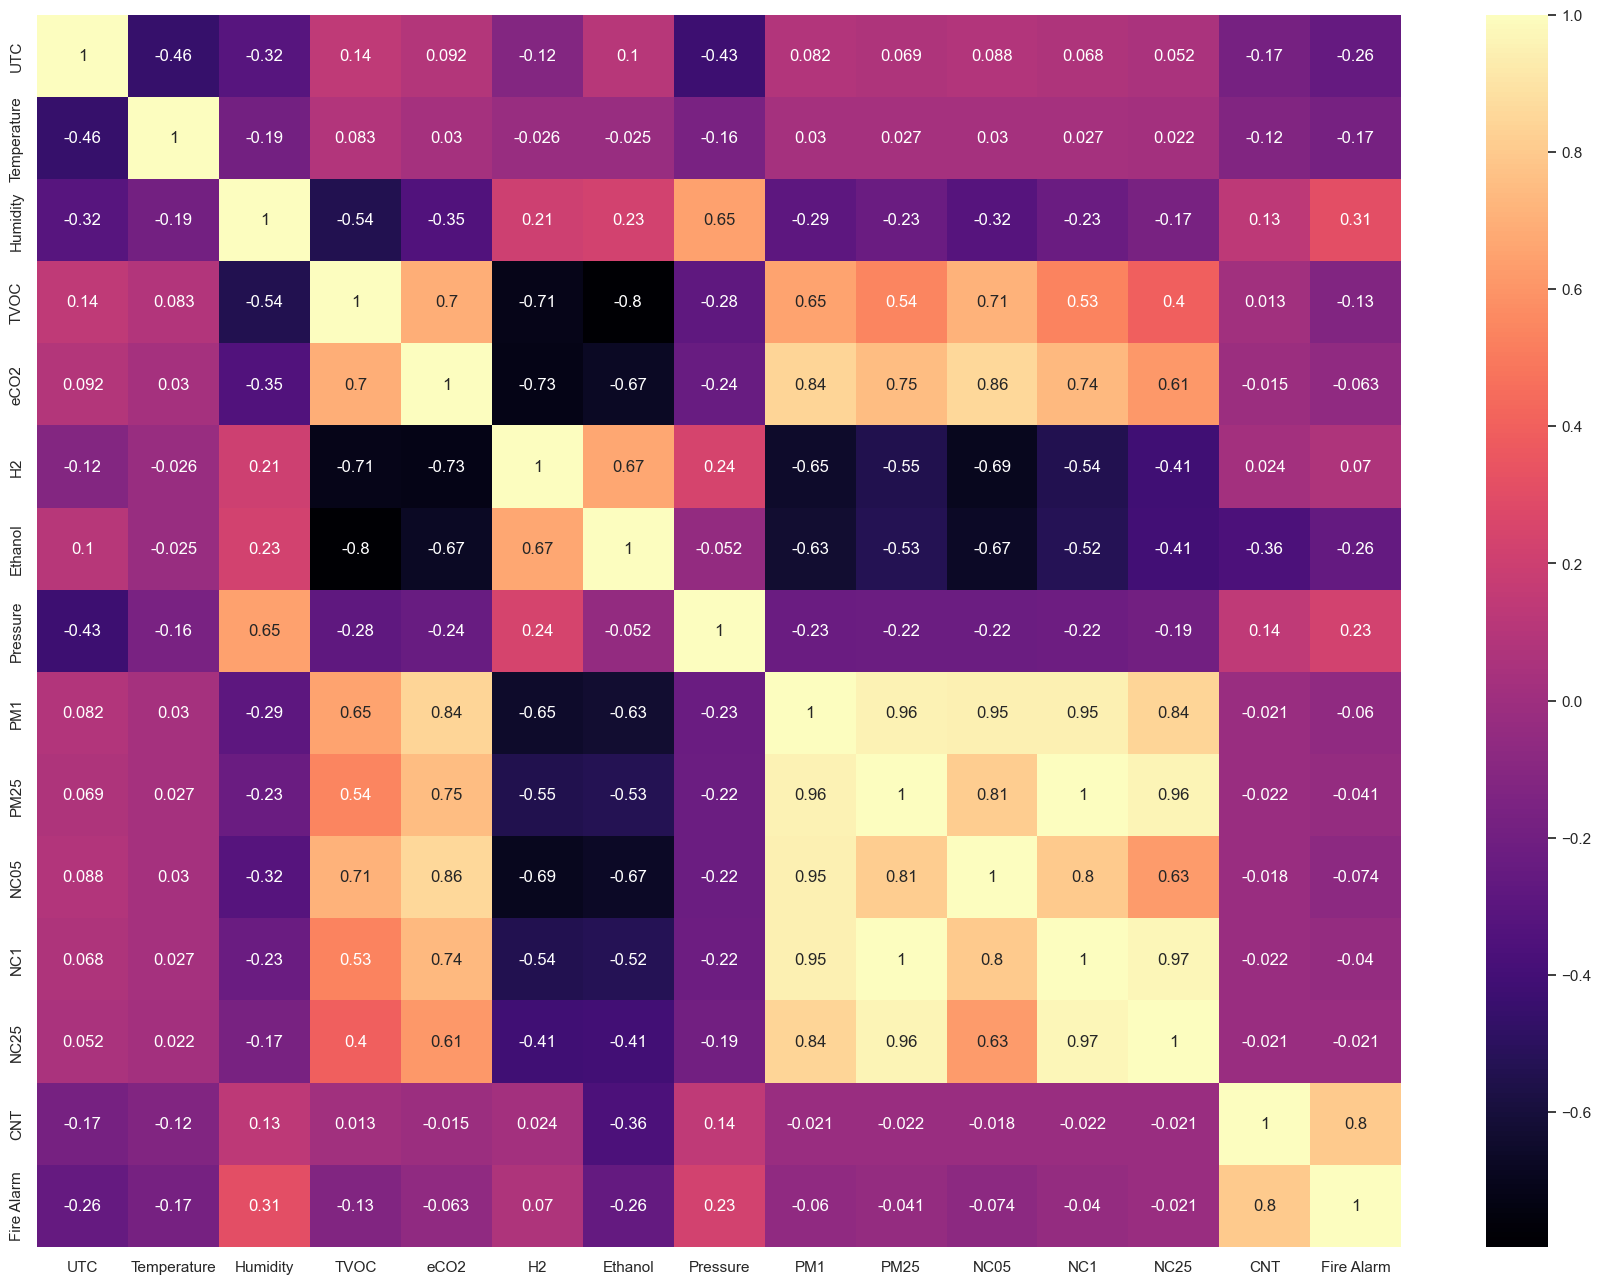

In [81]:
cor=TR_data.corr()
plt.figure(figsize = (22,16))
#plhttp://localhost:8888/notebooks/Downloads/101_3.ipynb#t.title('Correlation Matrix')
sns.heatmap(cor,annot = True,cmap='magma')
plt.show()

# Null Values

In [82]:
TR_data.isnull().sum()

UTC            0
Temperature    0
Humidity       0
TVOC           0
eCO2           0
H2             0
Ethanol        0
Pressure       0
PM1            0
PM25           0
NC05           0
NC1            0
NC25           0
CNT            0
Fire Alarm     0
dtype: int64

# Outliers

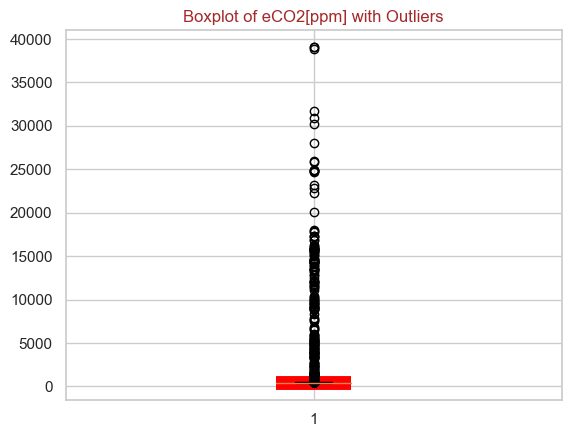

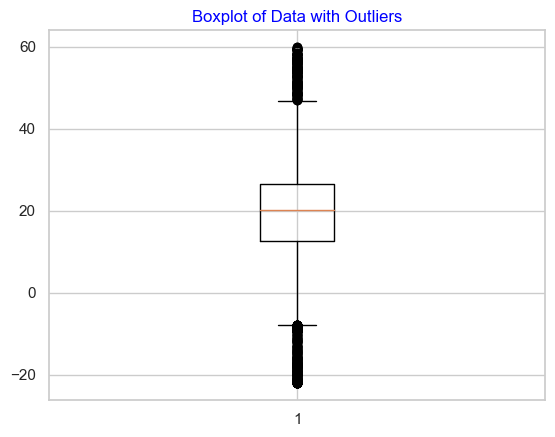

In [83]:
boxplot = plt.boxplot(TR_data['eCO2'], patch_artist=True)
for box in boxplot['boxes']:
    box.set(color='red', linewidth=10)
plt.title('Boxplot of eCO2[ppm] with Outliers', color='brown')
plt.show()


plt.boxplot(TR_data['Temperature'])
plt.title('Boxplot of Data with Outliers',color='blue')
plt.show()

In [84]:
columns = ['Temperature', 'Humidity', 'TVOC', 'eCO2', 'Ethanol', 'Pressure', 'PM1', 'PM25','NC05','NC1','NC25','CNT']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(TR_data[col], 25), np.percentile(TR_data[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( TR_data[col] < lower) | (TR_data[col] > upper) )
    index_label = TR_data[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    TR_data.drop(index_label, inplace=True)

Number of outliers in Temperature: 519
Number of outliers in Humidity: 296
Number of outliers in TVOC: 935
Number of outliers in eCO2: 461
Number of outliers in Ethanol: 0
Number of outliers in Pressure: 1
Number of outliers in PM1: 0
Number of outliers in PM25: 0
Number of outliers in NC05: 0
Number of outliers in NC1: 2
Number of outliers in NC25: 33
Number of outliers in CNT: 208


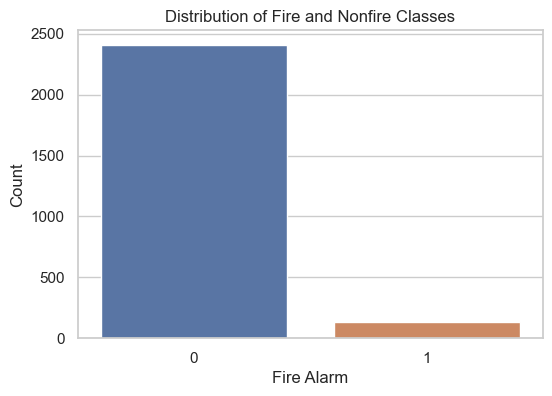

In [85]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(data=TR_data, x='Fire Alarm')
plt.xlabel('Fire Alarm')
plt.ylabel('Count')
plt.title('Distribution of Fire and Nonfire Classes')
plt.show()

<Axes: xlabel='eCO2', ylabel='Density'>

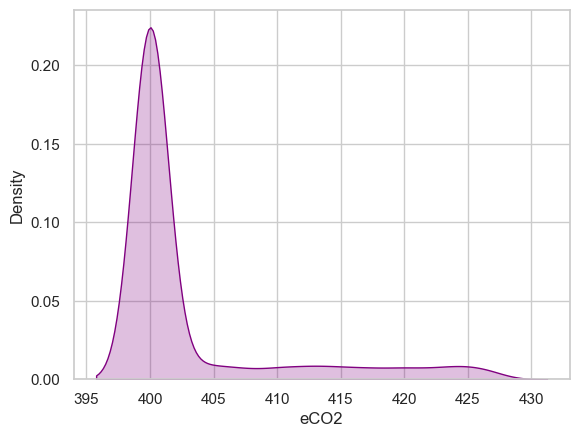

In [86]:
sns.kdeplot(TR_data['eCO2'], shade=True, color='purple')


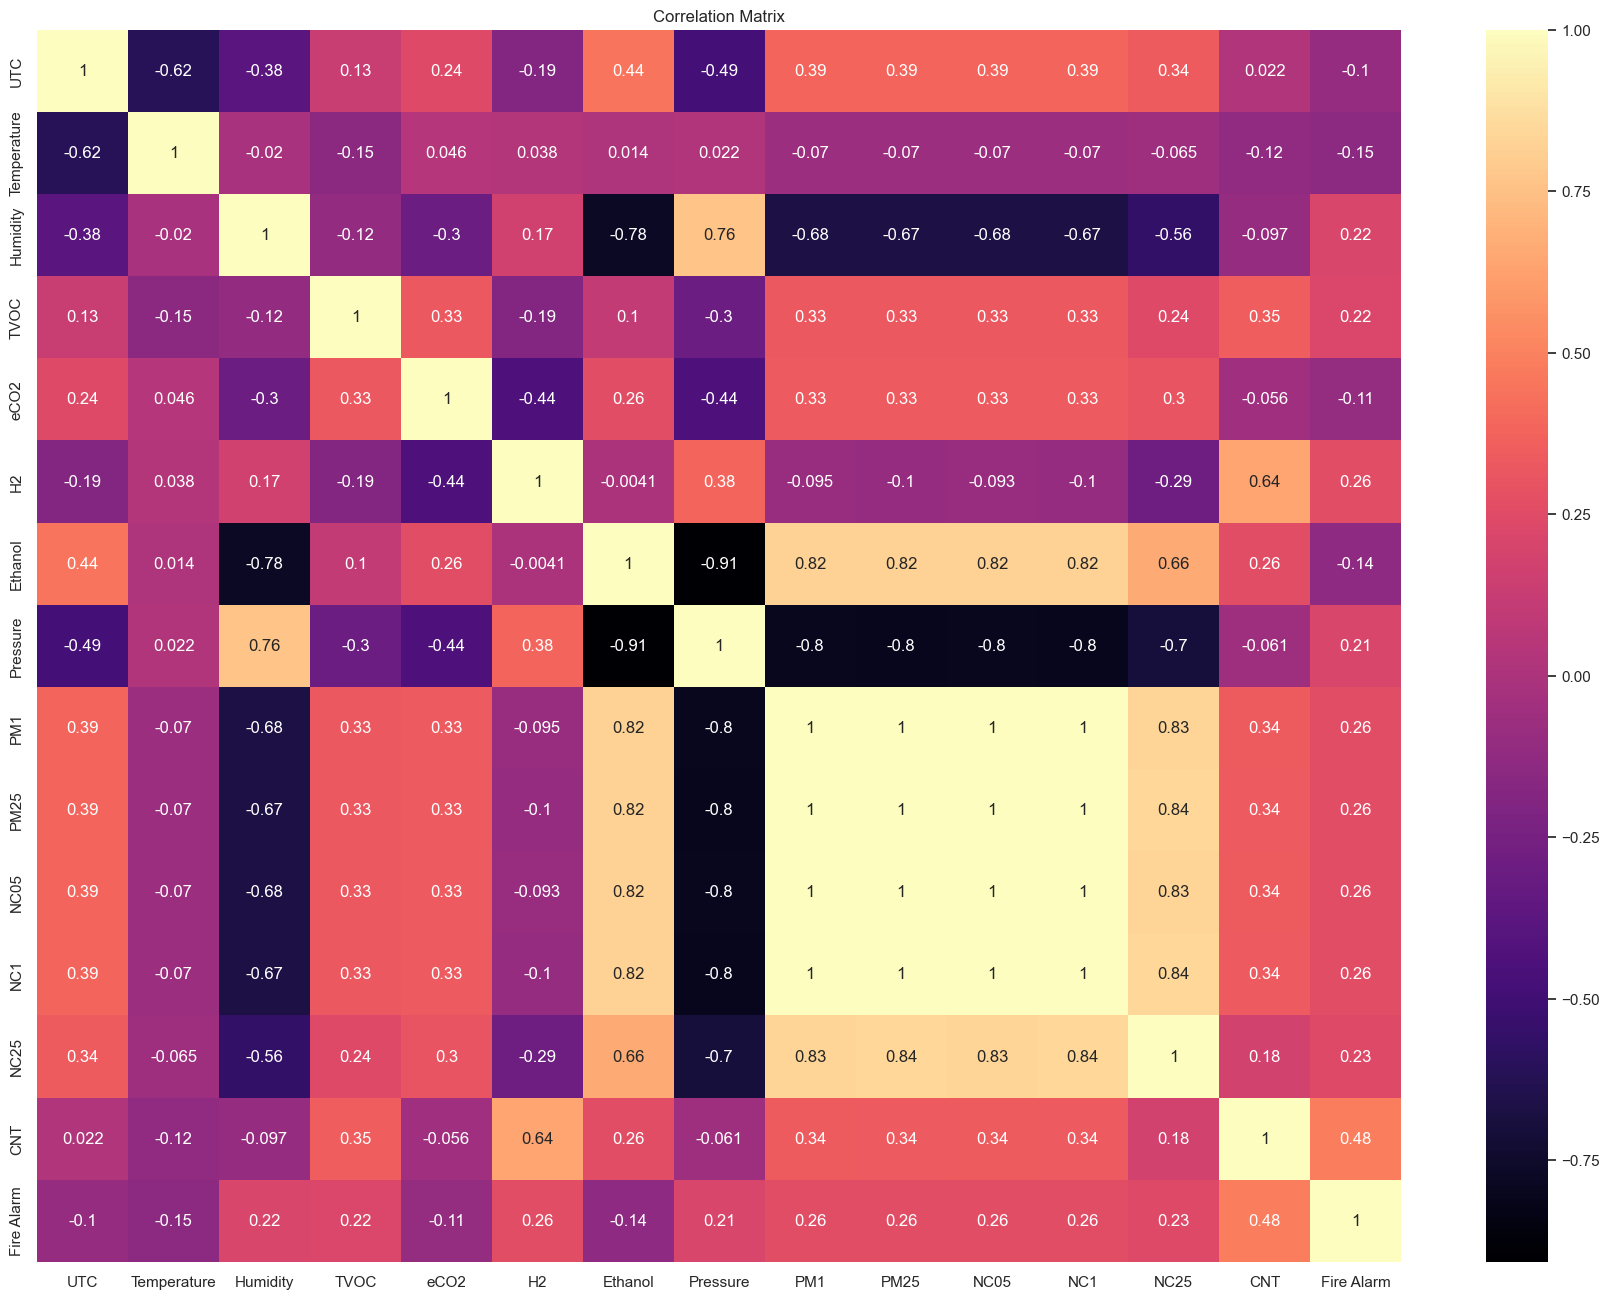

In [87]:
cor=TR_data.corr()
plt.figure(figsize = (22,16))
plt.title('Correlation Matrix')
sns.heatmap(cor,annot = True,cmap='magma')
plt.show()

In [88]:
cor1 = TR_data.corr(method='pearson')['Fire Alarm']
cor1

UTC           -0.099895
Temperature   -0.146037
Humidity       0.215647
TVOC           0.219113
eCO2          -0.105692
H2             0.255638
Ethanol       -0.135148
Pressure       0.212638
PM1            0.255956
PM25           0.256475
NC05           0.255839
NC1            0.256550
NC25           0.234463
CNT            0.482009
Fire Alarm     1.000000
Name: Fire Alarm, dtype: float64

# After handling outliers

 the correlations between all columns and the 'Fire Alarm' column have changed. As a result, there are now some columns that should be considered for removal or dropping from the dataset.

In [89]:
TR_data.drop(['eCO2'],axis=1,inplace=True)
TR_data

,UTC,Temperature,Humidity,TVOC,H2,Ethanol,Pressure,PM1,PM25,NC05,NC1,NC25,CNT,Fire Alarm
0,1655127646,15.127,42.98,199,12775,20524,937.420,1.55,1.61,10.66,1.663,0.038,3338,0
1,1654734418,27.107,54.80,0,13058,19961,939.799,0.21,0.22,1.46,0.228,0.005,1087,0
2,1654714047,26.370,45.80,144,12784,20580,937.376,1.97,2.05,13.59,2.118,0.048,1860,0
4,1655125243,-1.197,41.36,76,12791,20673,937.556,1.90,1.97,13.08,2.040,0.046,935,0
5,1654712431,27.050,44.61,58,12834,20724,937.559,2.13,2.21,14.64,2.284,0.052,244,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,1654713576,26.130,46.90,89,12787,20635,937.425,1.76,1.83,12.10,1.887,0.043,1389,0
4994,1655127573,16.690,47.14,177,12777,20538,937.390,1.77,1.84,12.19,1.900,0.043,3265,0
4996,1654714530,26.120,46.98,135,12782,20585,937.304,1.73,1.80,11.91,1.858,0.042,2343,0
4998,1654715405,28.630,42.91,191,12780,20534,937.349,1.82,1.89,12.54,1.955,0.044,3218,0


In [90]:
average_temperature = TR_data['Temperature'].sum() / len(TR_data)
average_temperature

18.468542239685657

# logistic regression model

In [91]:
TR_data.columns

Index(['UTC', 'Temperature', 'Humidity', 'TVOC', 'H2', 'Ethanol', 'Pressure',
       'PM1', 'PM25', 'NC05', 'NC1', 'NC25', 'CNT', 'Fire Alarm'],
      dtype='object')

In [92]:
# Extract the target variable (Fire Alarm) from the training data

y_train = TR_data['Fire Alarm']
X_train = TR_data.drop(['Fire Alarm'], axis=1)

from sklearn.model_selection import train_test_split

## Splitting the data
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


# Create and train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_split, y_train_split)

# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9541884816753927
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       729
           1       0.00      0.00      0.00        35

    accuracy                           0.95       764
   macro avg       0.48      0.50      0.49       764
weighted avg       0.91      0.95      0.93       764



[[729   0]
 [ 35   0]]


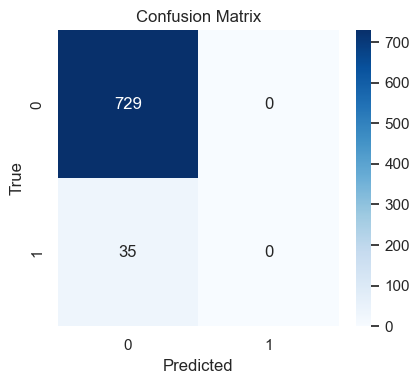

In [93]:
cm = confusion_matrix(y_val, y_pred)
print(cm)


plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')


plt.tight_layout()
plt.show()

In [94]:
# Accessing elements at index 169 using .iloc
print(X_train.iloc[169])
print(y_train.iloc[169])


UTC            1.654764e+09
Temperature    1.824000e+01
Humidity       5.234000e+01
TVOC           1.240000e+02
H2             1.318000e+04
Ethanol        2.005800e+04
Pressure       9.396630e+02
PM1            9.500000e-01
PM25           9.900000e-01
NC05           6.560000e+00
NC1            1.023000e+00
NC25           2.300000e-02
CNT            2.823000e+03
Name: 331, dtype: float64
0


In [95]:
# Example: Load preprocessed new data (replace with your own data)
input_data=(1.654736e+09,1.996400e+01,4.978000e+01,2.800000e+01,4.000000e+02,2.014100e+04,9.396150e+02,1.260000e+00,1.310000e+00,8.700000e+00,1.357000e+00,3.100000e-02,2.274000e+03)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)


[0]


# DecisionTree Model

In [96]:
from sklearn.tree import DecisionTreeClassifier
acc1=[]
acc2=[]
for i in range (2,16):
  dtc1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
  dtc1.fit(X_train_split,y_train_split)
  dtc2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
  dtc2.fit(X_train_split,y_train_split)
  acc1.append(dtc1.score(X_val, y_val))
  acc2.append(dtc2.score(X_val, y_val))

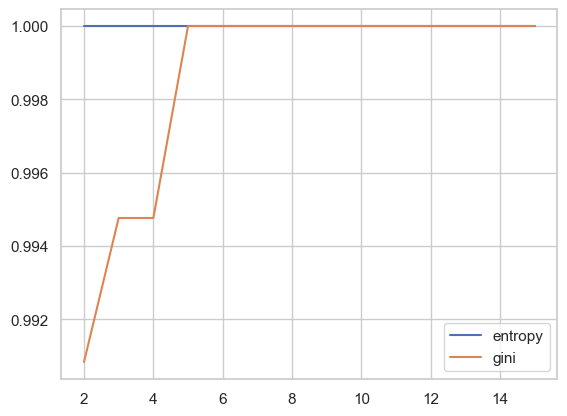

In [97]:
plt.plot(range(2,16),acc1,label="entropy")
plt.plot(range(2,16),acc2,label="gini")
plt.legend()


In [98]:
clf = DecisionTreeClassifier(max_depth = 6 , criterion = 'entropy', random_state = 42)
clf = clf.fit(X_train_split, y_train_split)
print(clf.score(X_val, y_val) * 100)


100.0


# KNN Model

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

<Figure size 700x700 with 0 Axes>

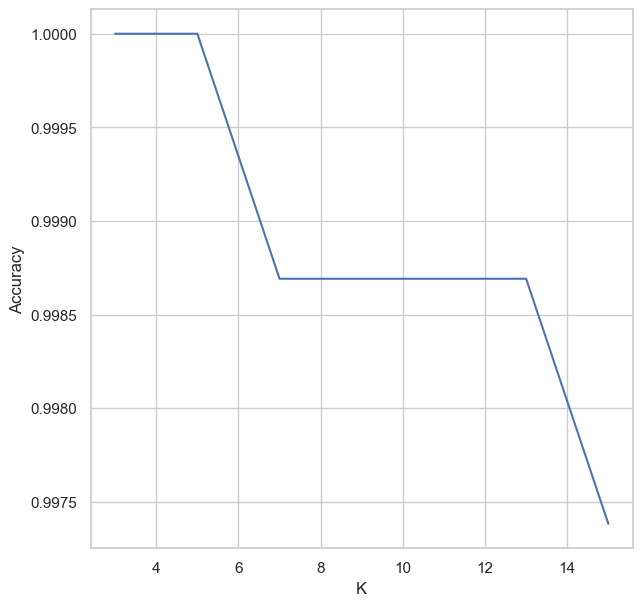

In [99]:
from sklearn.neighbors import KNeighborsClassifier
wss=[]
for k in range (3,16,2):
    knn= KNeighborsClassifier(n_neighbors=k)
    knn=knn.fit(X_train_split,y_train_split)
    s=knn.score(X_val, y_val)
    wss.append(s)
    plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.plot(range(3,16,2),wss)

In [100]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=14)
scores_knn = cross_val_score(knn, X_val, y_val, cv=10,scoring="accuracy")
print(scores_knn.mean()*100)

98.69446343130554


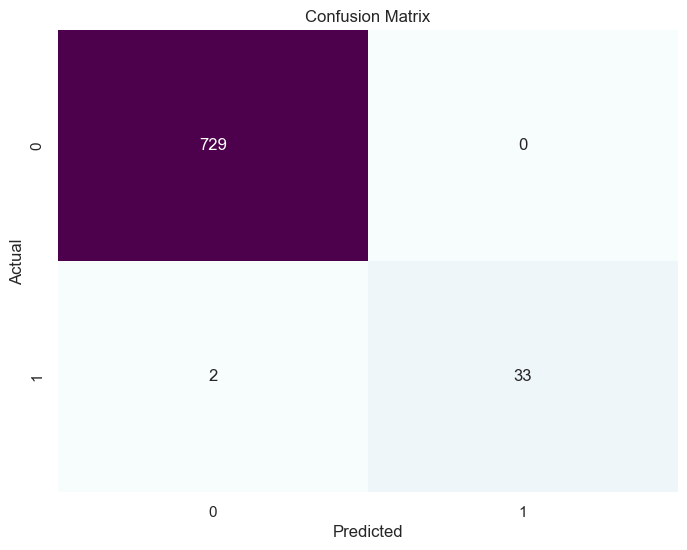

In [101]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
knn.fit(X_train_split,y_train_split)
Y_prd_knn=knn.predict(X_val)
y_pred_knn = knn.predict(X_val)
cm = confusion_matrix(y_val, y_pred_knn)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [102]:
# Save the Logistic Regression model logreg
joblib_logistic = "logistic_regression_file"
joblib.dump(model, joblib_logistic)

loaded_model = joblib.load(open(joblib_logistic, 'rb'))

pred_Y = loaded_model.predict(X_val)
result_logistic = np.round(accuracy_score(y_val, y_pred) ,2)
print(result_logistic)

0.95
